### Importing and exporting data
with Read table for general delimated file

In [222]:
import pandas as pd
# Read table mostly used for tab seperated .txt files
df = pd.read_table('../datasets/data.txt') # relative path
df

,name,score,sex
0,Tim,80,M
1,Tom,85,M
2,Kim,70,F
3,Sam,90,M
4,Efe,75,M


In [223]:
# Read csv is commonly used for most data readings, its comma separated
df2 = pd.read_csv('../datasets/data2.txt')
df2

,Tom,80,M
0,Tim,85,M
1,Kim,70,M
2,Kate,90,F
3,Alex,75,F


In [224]:
# without header = none; pandas consider 1st row as header
# You can specify the column names wits names attribute and pass a list of name for each column
df = pd.read_csv('../datasets/data2.txt', sep=',', header=None, names=['name', 'age', 'sex'])
df

,name,age,sex
0,Tom,80,M
1,Tim,85,M
2,Kim,70,M
3,Kate,90,F
4,Alex,75,F


In [225]:
# index_col='name' sets name as labelled index
df = pd.read_csv('../datasets/data2.txt', sep=',', header=None, names=['name', 'age', 'sex'], index_col='name')
df

,age,sex
name,,
Tom,80,M
Tim,85,M
Kim,70,M
Kate,90,F
Alex,75,F


In [226]:
df3 = pd.read_csv('../datasets/data4.txt')
df3

,,This data is collected by government of Nepal: collection date:
name,score,sex
#scores of students,NaN,NaN
Tim,80,M
Kate,85,F
Alex,70,M
Tom,90,M
Kim,75,F


In [227]:
# data cleaning => skip unnecessary rows

df3 = pd.read_csv('../datasets/data4.txt', sep=',', skiprows=[0, 2])
df3

,name,score,sex
0,Tim,80,M
1,Kate,85,F
2,Alex,70,M
3,Tom,90,M
4,Kim,75,F


In [228]:
# skip unnecessary rows and cols at once
## skiprows=[0,2] => remove rows of 0th and 2nd index
## usecols=[0,1] => use cols of 0th and 1st index
df3=pd.read_csv('../datasets/data4.txt', sep=',', skiprows=[0,2], usecols=[0,1])
df3

,name,score
0,Tim,80
1,Kate,85
2,Alex,70
3,Tom,90
4,Kim,75


In [229]:
# Reading with excel
! df_excel = pd.read_excel('file_path.txt')

zsh:1: invalid mode specification


### We can also read directly by connection databases like
conn = sqlite3.connect('database.db')

df_sql = pd.read_sql('SELECT * FROM table_name', conn)

In [230]:
# Exporting / writing in CSV
df = pd.read_csv('../datasets/data.txt', sep='\t')
df

,name,score,sex
0,Tim,80,M
1,Tom,85,M
2,Kim,70,F
3,Sam,90,M
4,Efe,75,M


In [231]:
# Exporting / writing in CSV
df.to_csv('cleaned_data.csv', sep='\t')

## GroupBy
groupby() function in pandas is used to split the data into groups based on some criteria

and we can apply a function to each group independently

In [232]:
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Values': [10,20,30,40,50]}
df = pd.DataFrame(data)
print(df)

  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50


In [233]:
# Group by 'Category' and calculate the sum of 'Values'
grouped = df.groupby('Category')
print(grouped)
grouped.head()
grouped.sum()

,Values
Category,
A,90
B,60


In [234]:
grouped.mean()

,Values
Category,
A,30.0
B,30.0


In [235]:
# With Real Data
game=pd.read_csv('../datasets/vgsalesGlobale.csv')
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [236]:
game.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [237]:
game.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [238]:
game.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [239]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [240]:
game.Global_Sales.mean() # use dot operator to access colums if column name is not space sepatated

np.float64(0.5374406555006628)

In [241]:
group = game.groupby('Genre')
group.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
547,548,Pokémon Stadium 2,N64,2000.0,Strategy,Nintendo,1.02,0.36,1.13,0.23,2.73
549,550,L.A. Noire,X360,2011.0,Adventure,Take-Two Interactive,1.52,0.94,0.02,0.24,2.72
578,579,Halo Wars,X360,2009.0,Strategy,Microsoft Game Studios,1.53,0.82,0.04,0.24,2.63
648,649,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40


In [ ]:
# Returns the number of non-NaN (non-missing) entries per column in each group.
group['Global_Sales'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [ ]:
# Show stats (mean, std, min, max...) for each genre
group['Global_Sales'].describe() # Data describe for global sales on the group genre

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [300]:
# Total sales per genre
game.groupby('Genre')['Global_Sales'].sum()

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [ ]:
# count how many games per genre
# Returns the total number of rows in each group, including missing (NaN) values.
game.groupby('Genre').size()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64

In [307]:
game.groupby(['Genre', 'Publisher'])['Global_Sales'].size()


Genre     Publisher                             
Action    20th Century Fox Video Games               4
          3DO                                       17
          505 Games                                 21
          5pb                                        5
          989 Studios                                2
                                                    ..
Strategy  Vivendi Games                             12
          Warner Bros. Interactive Entertainment     2
          Westwood Studios                           1
          Zoo Digital Publishing                     1
          Zushi Games                                2
Name: Global_Sales, Length: 1825, dtype: int64

<Axes: xlabel='Genre'>

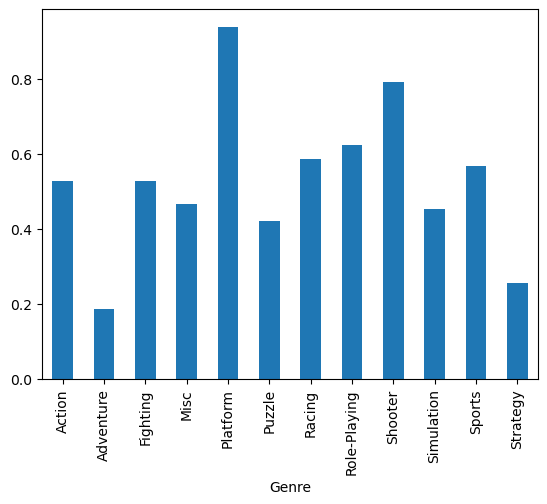

In [244]:
group['Global_Sales'].mean().plot(kind='bar')

### Missing Data in Pandas

In [245]:
import pandas as pd
import numpy as np

In [246]:
from numpy import nan as NA

In [247]:
df = pd.DataFrame([[1,2,3], [4,None,5],[NA,NA,NA]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [248]:
### CHECKING NAN

df.isnull().any() # .any shows if NaN values present in any column or for any feature

0    True
1    True
2    True
dtype: bool

In [249]:
## Drop Row or Column having Na
df.dropna(inplace=False)

,0,1,2
0,1.0,2.0,3.0


In [250]:
# Since above, we did inplace = False, the original df remained same
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [251]:
df.dropna(how='all') # drop row that contains all NaN values (default is axis 0 / row)
# Since the last row (2nd index) contains all NaN values, its dropped now

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0


In [252]:
# If you are storing values in new variable, its ok not to give inplace and now the new values are stored in this variable
df_new = df.dropna(how='all') 

In [253]:
# Original df is still unchanged
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [254]:
# Now df_new have the new dafa frame but the original df is still the same
df_new

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0


In [255]:
df = pd.DataFrame([[1,2,3], [4,None,5],[NA,NA,NA]])
df[1] = NA # set all values of 1 column to NaN
df

,0,1,2
0,1.0,NaN,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [259]:
df.dropna(axis=1, how='all', inplace=False) # (axis = 1 => sets for changes in column)removes the whole column that has all NaN values (col-1 in this case)

,0,2
0,1.0,3.0
1,4.0,5.0
2,NaN,NaN


In [ ]:
# Original df still unchanged
df

,0,1,2
0,1.0,NaN,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


### Fill NaN values with other values

In [261]:
df.fillna(0)

,0,1,2
0,1.0,0.0,3.0
1,4.0,0.0,5.0
2,0.0,0.0,0.0


In [ ]:
# Pass a dictonary to fill NaN values with given values in dict. (Dict keys represent columns)
df.fillna({0:5,1:7,2:15})

,0,1,2
0,1.0,7.0,3.0
1,4.0,7.0,5.0
2,5.0,7.0,15.0


### Forward Fill - Fill method propagates the last valid (non-null) values forward to replace any missing values
axis = 0 : Fill column-wise (default behaviour)

axis = 1: Fill row-wise

In [264]:
df

,0,1,2
0,1.0,NaN,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [ ]:
df.fillna(method='ffill', axis=1) # Fills with values from across the columns
# use df.ffill(axis=1) => in the future

/var/folders/y5/5lrz8v6s505c09js64f3pkb00000gn/T/ipykernel_35367/901808322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2
0,1.0,1.0,3.0
1,4.0,4.0,5.0
2,NaN,NaN,NaN


In [269]:
df = pd.DataFrame([[1,2,3], [4,None,5],[NA,NA,NA]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [ ]:
df.fillna(method='ffill', limit=1) # default axis=0, just fill the first missing value with its earlier value down the row

/var/folders/y5/5lrz8v6s505c09js64f3pkb00000gn/T/ipykernel_35367/4161896779.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=1) # default axis=0, just fill the first missing value with its earlier value


,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,5.0
2,4.0,NaN,5.0


#### Filling with aggrigations

In [271]:
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [272]:
df.fillna(df.mean(axis=1))

,0,1,2
0,1.0,2.0,3.0
1,4.0,4.5,5.0
2,2.0,4.5,NaN


 ## Joining DataFrame
  merge() function allows you to combine two DataFrames based on a common column (like SQL joins: 'inner', 'left', 'right', 'outer').
 ### Inner Join:
  Only the rows with common keys (default)

In [282]:
d1 = pd.DataFrame(
    {"key": ["a","b","c","c","c","d","e"],
     "num1": range(7)}  
)

d2 = pd.DataFrame(
    {"key": ["b","c","e","f"],
     "num2": range(4)}  
)

In [283]:
print(d1)
print(d2)

  key  num1
0   a     0
1   b     1
2   c     2
3   c     3
4   c     4
5   d     5
6   e     6
  key  num2
0   b     0
1   c     1
2   e     2
3   f     3


In [284]:
pd.merge(d1, d2) # merge uses inner join by default

,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,c,4,1
4,e,6,2


In [277]:
pd.merge(d1, d2, on='key')

,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,e,5,2


In [279]:
d3 = pd.DataFrame(
    {"key1": ["a","b","c","c","d","e"],
     "num1": range(6)}  
)

d4 = pd.DataFrame(
    {"key2": ["b","c","e","f"],
     "num2": range(4)}  
)

In [280]:
print(d3)
print(d4)

  key1  num1
0    a     0
1    b     1
2    c     2
3    c     3
4    d     4
5    e     5
  key2  num2
0    b     0
1    c     1
2    e     2
3    f     3


In [281]:
pd.merge(d3,d4,left_on='key1', right_on='key2')

,key1,num1,key2,num2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,e,5,e,2


### Outer Join
All rows from both DataFrames, with NaN where no match is found

In [285]:
print(d1)
print(d2)

  key  num1
0   a     0
1   b     1
2   c     2
3   c     3
4   c     4
5   d     5
6   e     6
  key  num2
0   b     0
1   c     1
2   e     2
3   f     3


In [ ]:
pd.merge(d1,d2,how='outer') # Outer join gives all values of both dfs, NaN if any df does not contain the data

,key,num1,num2
0,a,0.0,NaN
1,b,1.0,0.0
2,c,2.0,1.0
3,c,3.0,1.0
4,c,4.0,1.0
5,d,5.0,NaN
6,e,6.0,2.0
7,f,NaN,3.0


### Left Join
All roes from the left DataFrame, with matching rows from the right DataFrame

In [289]:
pd.merge(d1,d2,how='left')

,key,num1,num2
0,a,0,NaN
1,b,1,0.0
2,c,2,1.0
3,c,3,1.0
4,c,4,1.0
5,d,5,NaN
6,e,6,2.0


### Right Join
All rows from the right DataFrame, with matching rows from the left DataFrame

In [288]:
pd.merge(d1,d2,how='right')

,key,num1,num2
0,b,1.0,0
1,c,2.0,1
2,c,3.0,1
3,c,4.0,1
4,e,6.0,2
5,f,NaN,3


## Merging on Index

In [290]:
df1 = pd.DataFrame(
    {"letter": ["a", "a", "b", "b", "a", "c"],
     "num": range(6)}
)

df2 = pd.DataFrame(
    {"value": [3, 5, 7]},
    index=["a", "b", "e"]
)

In [291]:
print(df1)
print(df2)

  letter  num
0      a    0
1      a    1
2      b    2
3      b    3
4      a    4
5      c    5
   value
a      3
b      5
e      7


In [292]:
pd.merge(df1,df2, left_on='letter', right_index=True)

,letter,num,value
0,a,0,3
1,a,1,3
2,b,2,5
3,b,3,5
4,a,4,3


In [293]:
data1 = pd.DataFrame(
    [[1,2],[3,4],[5,6]],
    index=["a","c","d"],
    columns=["Tom","Tim"])

data2 = pd.DataFrame(
    [[7,8],[9,10],[11,12],[13,14]],
    index=["a","b","e","f"],
    columns=["Sam","Kim"])

In [294]:
print(data1)
print(data2)

   Tom  Tim
a    1    2
c    3    4
d    5    6
   Sam  Kim
a    7    8
b    9   10
e   11   12
f   13   14


In [295]:
pd.merge(data1, data2, right_index=True, left_index=True,how='outer')

,Tom,Tim,Sam,Kim
a,1.0,2.0,7.0,8.0
b,NaN,NaN,9.0,10.0
c,3.0,4.0,NaN,NaN
d,5.0,6.0,NaN,NaN
e,NaN,NaN,11.0,12.0
f,NaN,NaN,13.0,14.0


### Using Obj.join()
Join method always joins using index by default

In [ ]:
data2.join(data1) # default is left join

,Sam,Kim,Tom,Tim
a,7,8,1.0,2.0
b,9,10,NaN,NaN
e,11,12,NaN,NaN
f,13,14,NaN,NaN


In [299]:
data1.join(data2)

,Tom,Tim,Sam,Kim
a,1,2,7.0,8.0
c,3,4,NaN,NaN
d,5,6,NaN,NaN


In [297]:
data1.join(data2, how='outer')

,Tom,Tim,Sam,Kim
a,1.0,2.0,7.0,8.0
b,NaN,NaN,9.0,10.0
c,3.0,4.0,NaN,NaN
d,5.0,6.0,NaN,NaN
e,NaN,NaN,11.0,12.0
f,NaN,NaN,13.0,14.0
